In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Retrieving the data

In [2]:
students_results = pd.read_csv('data/data_pairprogramming_students.csv', sep='|', encoding='UTF-16 LE')
teachers_results = pd.read_csv('data/data_pairprogramming_teachers.csv', sep='|', encoding='UTF-16 LE')

## Students data

In [3]:
students_results.fillna("", inplace=True)

In [4]:
prescreen_students = students_results[students_results['QUESTNNR']=='prescreen']
survey_students = students_results[students_results['QUESTNNR']=='survey']
print(f"{prescreen_students.shape[0]} respondents participated in the student prescreen.")
print(f"{survey_students.shape[0]} respondents participated in the student survey.\n")

prescreen_students_finished = prescreen_students[prescreen_students['FINISHED']==1]
survey_students_finished = survey_students[survey_students['FINISHED']==1]
print(f"{prescreen_students_finished.shape[0]} finished the prescreen.")
print(f"{survey_students_finished.shape[0]} finished the survey.")

433 respondents participated in the student prescreen.
277 respondents participated in the student survey.

406 finished the prescreen.
252 finished the survey.


## Teachers data

In [22]:
teachers_results.fillna("", inplace=True)

In [23]:
prescreen_teachers = teachers_results[teachers_results['QUESTNNR']=='prescreen']
no_teachers = teachers_results[teachers_results['QUESTNNR']=='teachers-no']
survey_teachers = teachers_results[teachers_results['QUESTNNR']=='survey']
print(f"{prescreen_teachers.shape[0]} respondents participated in the teacher prescreen.")
print(f"{no_teachers.shape[0]} respondents participated in the teacher-no survey.")
print(f"{survey_teachers.shape[0]} respondents participated in the teacher survey.\n")

prescreen_teachers_finished = prescreen_teachers[prescreen_teachers['FINISHED']==1]
survey_teachers_finished = survey_teachers[survey_teachers['FINISHED']==1]
print(f"{prescreen_teachers_finished.shape[0]} finished the prescreen.")
print(f"{survey_teachers_finished.shape[0]} finished the survey.")

304 respondents participated in the teacher prescreen.
109 respondents participated in the teacher-no survey.
83 respondents participated in the teacher survey.

303 finished the prescreen.
82 finished the survey.


# Analysis

## Students data

In [98]:
categorical_questions_students = [
    'ED01',
    'ED03',
    'ED04',
    'EX01',
    'EX03',
    'EX04',
    'EX05',
    'EX06',
    'EX07',
    'BP01',
    'BP02',
    'BP03',
    'DI01',
    'DI02',
    'PE01',
    'PE02',
    'PE05',
    'EQ01'
]

### Education

**ED01** At which stage of your education did you practice pair programming and how often?

In [101]:
# TODO

**ED03** How would you rate your computer science skills (e.g. programming skills) to the time of this specific course?

<AxesSubplot:title={'center':'Prior CS skills'}>

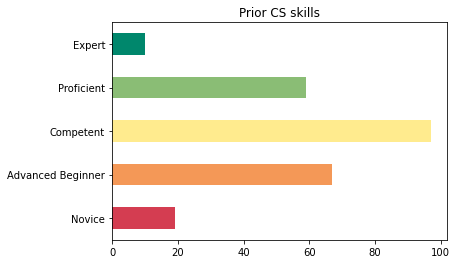

In [111]:
survey_students_finished['ED03'].value_counts().reindex([
    'Novice', 'Advanced Beginner', 'Competent', 'Proficient', 'Expert'
]).plot.barh(
    title="Prior CS skills",
    color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c']
)

**ED04** At which stage of your education did you practice this specific course of pair programming?

<AxesSubplot:title={'center':'Education stage'}>

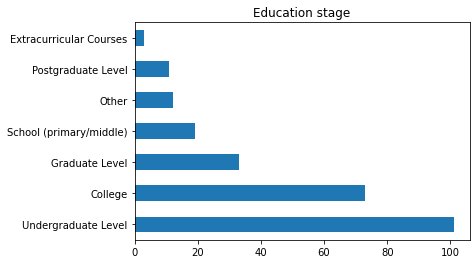

In [82]:
survey_students_finished['ED04'].value_counts().plot.barh(title="Education stage")

### Experience with PP

**EX01** How would you rate your experience with pair programming in this specific course?

<AxesSubplot:title={'center':'Experience with a particular case of PP on Likert scale'}>

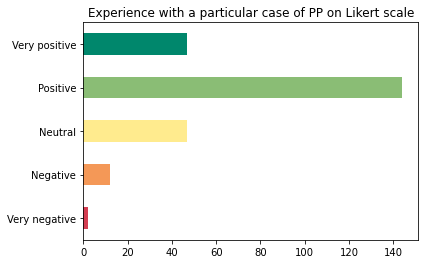

In [119]:
survey_students_finished['EX01'].value_counts().reindex([
    "Very negative", "Negative", "Neutral", "Positive", "Very positive"
]).plot.barh(
    title="Experience with a particular case of PP on Likert scale",
    color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c']
)

**EX02** Please explain the reasons for your experience.

In [115]:
# TODO Analyse free text

**EX03** Please rank the following positive aspects regarding their relevance (1 = highest) perceived by you in your specific course.

**EX04** Please rank the following negative aspects regarding their relevance (1 = highest) perceived by you in your specific course.

In [116]:
# TODO

**EX05** In general, how would you rate your experiences with pair programming?

<AxesSubplot:title={'center':'Overall experience with PP on Likert scale'}>

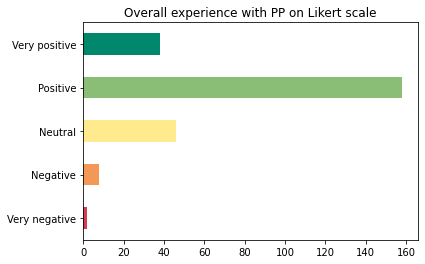

In [118]:
survey_students_finished['EX05'].value_counts().reindex([
    "Very negative", "Negative", "Neutral", "Positive", "Very positive"
]).plot.barh(
    title="Overall experience with PP on Likert scale",
    color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c']
)

**EX06** How well did you know your programming partner in this specific course?

<AxesSubplot:title={'center':'Knowing the partner'}>

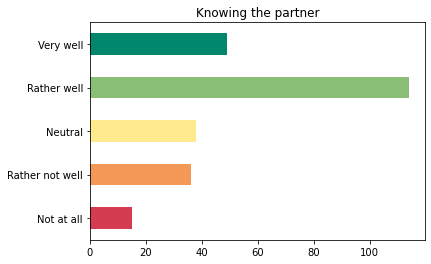

In [120]:
survey_students_finished['EX06'].value_counts().reindex([
    "Not at all", "Rather not well", "Neutral", "Rather well", "Very well"
]).plot.barh(
    title="Knowing the partner",
    color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c']
)

**EX07** In which year did you take this specific course?

<AxesSubplot:title={'center':'PP Year'}>

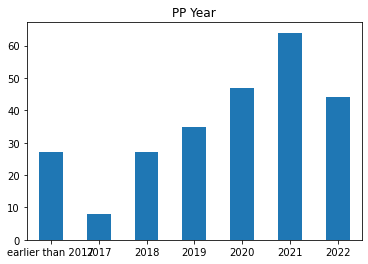

In [130]:
survey_students_finished['EX07'].value_counts().reindex([
    'earlier than 2017', '2017', '2018', '2019', '2020', '2021', '2022'
]).plot.bar(title="PP Year", rot=0)

### Behavioural patterns

**BP01** Did you feel like your partner or you dominated the conversational floor, expressing ideas and making suggestions more often? 

<AxesSubplot:title={'center':'Domination pattern'}>

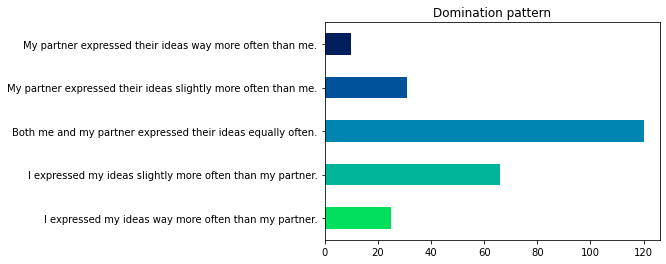

In [138]:
survey_students_finished['BP01'].value_counts().reindex([
    'I expressed my ideas way more often than my partner.', 
    'I expressed my ideas slightly more often than my partner.', 
    'Both me and my partner expressed their ideas equally often.', 
    'My partner expressed their ideas slightly more often than me.',
    'My partner expressed their ideas way more often than me.'
]).plot.barh(title="Domination pattern", color=['#00df5c', '#00b499', '#0084b2', '#00529a', '#001f5c'])

**BP02** In pair programming, the driver actively interacts with the computer, coding or designing while the navigator observes the working process and provides feedback to the driver. Did you and your partner only do what is prescribed by your roles?

<AxesSubplot:title={'center':'Role switching pattern'}>

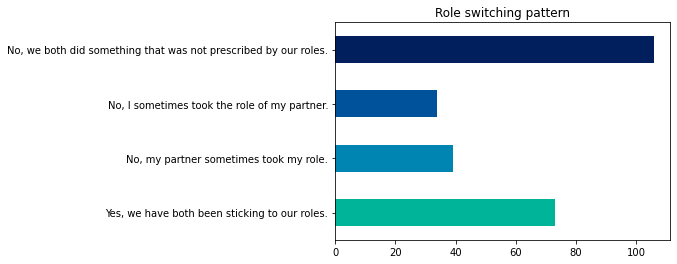

In [141]:
survey_students_finished['BP02'].value_counts().reindex([
    'Yes, we have both been sticking to our roles.', 
    'No, my partner sometimes took my role.', 
    'No, I sometimes took the role of my partner.', 
    'No, we both did something that was not prescribed by our roles.',
]).plot.barh(title="Role switching pattern", color=['#00b499', '#0084b2', '#00529a', '#001f5c'])

**BP03** In general, to what extent do you feel like your ideas and suggestions are appreciated and taken into account by your pair programming partner? 

<AxesSubplot:title={'center':'Appreciation in pair'}>

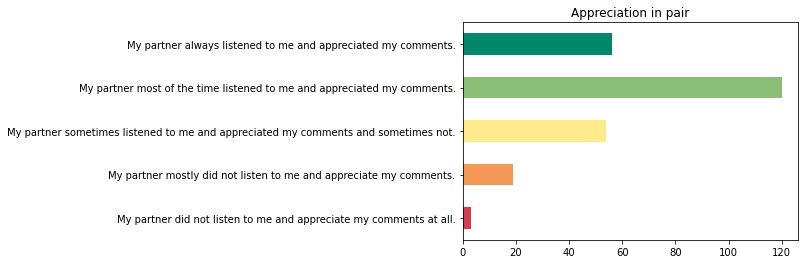

In [144]:
survey_students_finished['BP03'].value_counts().reindex([
    'My partner did not listen to me and appreciate my comments at all.', 
    'My partner mostly did not listen to me and appreciate my comments.', 
    'My partner sometimes listened to me and appreciated my comments and sometimes not.', 
    'My partner most of the time listened to me and appreciated my comments.',
    'My partner always listened to me and appreciated my comments.'
]).plot.barh(title="Appreciation in pair", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

### Diversity in pairs

**DI01** Is anything of the following true regarding you and your pair programming partner? 

In [148]:
# TODO survey_students_finished['DI01'].value_counts().plot.barh(title="Partners aspects")

**DI02** If you could choose a pair programming partner, which attribute would be most important to you?

<AxesSubplot:title={'center':'Important partners aspects'}>

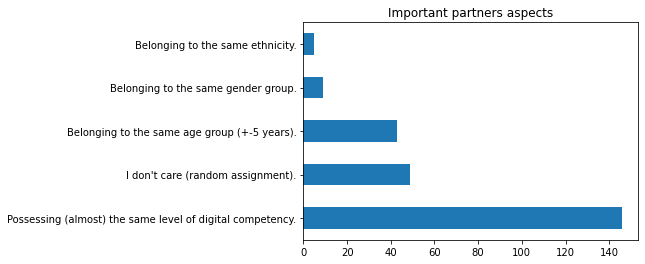

In [149]:
survey_students_finished['DI02'].value_counts().plot.barh(title="Important partners aspects")

**DI03** Please explain shortly your choice regarding the previous question.

In [150]:
# TODO Analyse free text

### Performance

**PE01** How did pair programming influence your learning (e.g. programming skills) in this specific course? 

<AxesSubplot:title={'center':'Learning skills influence'}>

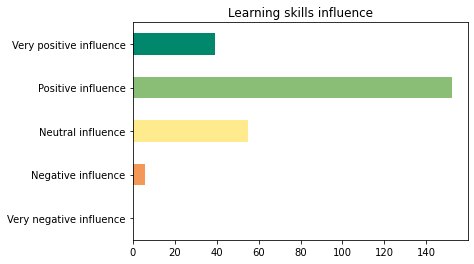

In [152]:
survey_students_finished['PE01'].value_counts().reindex([
    'Very negative influence', 
    'Negative influence', 
    'Neutral influence', 
    'Positive influence',
    'Very positive influence'
]).plot.barh(title="Learning skills influence", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

**PE02** How did pair programming influence your social skills (e.g. collaboration) in this specific course? 

<AxesSubplot:title={'center':'Social skills influence'}>

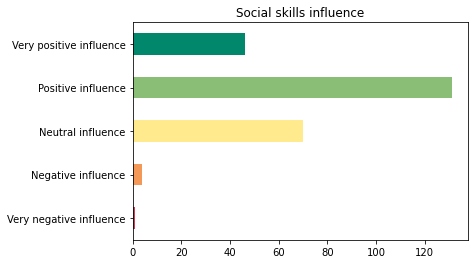

In [153]:
survey_students_finished['PE02'].value_counts().reindex([
    'Very negative influence', 
    'Negative influence', 
    'Neutral influence', 
    'Positive influence',
    'Very positive influence'
]).plot.barh(title="Social skills influence", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

**PE03** Please state shortly which learning skills were influenced by this course. (optional)

In [154]:
# TODO

**PE04** Please state shortly which social skills were influenced by this course. (optional)

In [155]:
# TODO

**PE05** Pair Programming helped me to be confident in my ability to program and solve problems in this task or later on.

<AxesSubplot:title={'center':'Confidence'}>

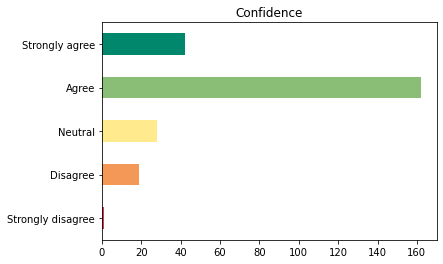

In [156]:
survey_students_finished['PE05'].value_counts().reindex([
    'Strongly disagree', 
    'Disagree', 
    'Neutral', 
    'Agree',
    'Strongly agree'
]).plot.barh(title="Confidence", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

### Equity and PP

**EQ01** Do you think that pair programming supports equity between students? 

<AxesSubplot:title={'center':'Equity support'}>

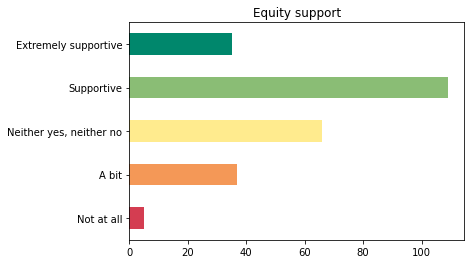

In [157]:
survey_students_finished['EQ01'].value_counts().reindex([
    'Not at all', 
    'A bit', 
    'Neither yes, neither no', 
    'Supportive',
    'Extremely supportive'
]).plot.barh(title="Equity support", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

**EQ02** Please shortly explain your choice in the previous question.

In [158]:
# TODO Free text analysis

## Teachers data

In [99]:
categorical_questions_teachers = [
    'ED01',
    'ED02',
    'ED04',
    'EX01',
    'EX03',
    'EX04',
    'EX05',
    'EX06',
    'PF01',
    'PF02',
    'PF04',
    'PF05',
    'PF07',
    'BP01',
    'BP02',
    'BP03',
    'PE01',
    'PE02',
    'PE03',
    'EQ01'
]

### Reasons for PP

**RE01** Why did you introduce pair programming in your class?

In [ ]:
# TODO Free text analysis

**RE02** Why haven't you used pair programming in your class yet?

In [3]:
# TODO Free text analysis

### Education

**ED01** At which stage of education did your students practice pair programming with you and how often?

In [4]:
# TODO

**ED04** At which stage of education do you currently teach?

In [19]:
# TODO Multiple choice

**ED02** At which stage of education did your students practice pair programming with you on this specific course?

<AxesSubplot:title={'center':'Stage of education (specific PP experience)'}>

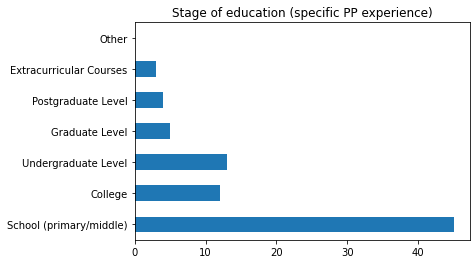

In [15]:
survey_teachers_finished['ED02'].value_counts().reindex([
    "School (primary/middle)",
    "College",
    "Undergraduate Level",
    "Graduate Level",
    "Postgraduate Level",
    "Extracurricular Courses",
    "Other"
]).plot.barh(title="Stage of education (specific PP experience)")

### Experience with PP

**EX01** How would you rate YOUR experience with pair programming in this specific course?

<AxesSubplot:title={'center':'Experience with a particular case of PP on Likert scale'}>

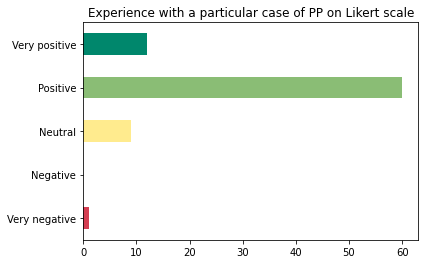

In [21]:
survey_teachers_finished['EX01'].value_counts().reindex([
    "Very negative", "Negative", "Neutral", "Positive", "Very positive"
]).plot.barh(
    title="Experience with a particular case of PP on Likert scale",
    color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c']
)

**EX03** In general, how would you rate your experiences with pair programming?

<AxesSubplot:title={'center':'Experience with a particular case of PP on Likert scale'}>

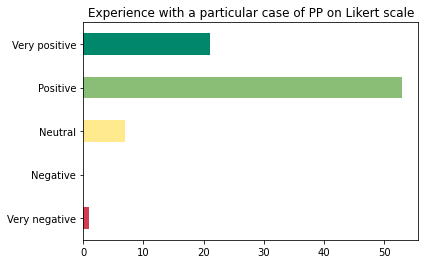

In [23]:
survey_teachers_finished['EX03'].value_counts().reindex([
    "Very negative", "Negative", "Neutral", "Positive", "Very positive"
]).plot.barh(
    title="Experience with a particular case of PP on Likert scale",
    color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c']
)

**EX02** Please explain the reasons for your experience.

In [24]:
# TODO Free text analysis

**EX04** In which year did you teach this specific course?

<AxesSubplot:title={'center':'PP Year'}>

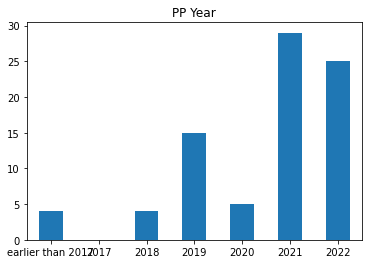

In [25]:
survey_teachers_finished['EX04'].value_counts().reindex([
    'earlier than 2017', '2017', '2018', '2019', '2020', '2021', '2022'
]).plot.bar(title="PP Year", rot=0)

**EX05** Please estimate the computer science skills (e.g. programming skills) of your students to the time of this specific course.

<AxesSubplot:title={'center':'Prior CS skills'}>

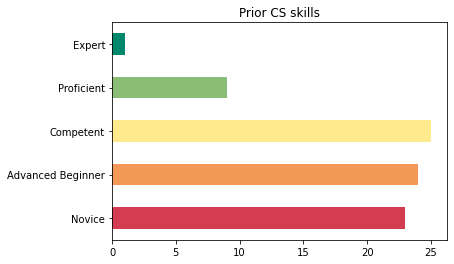

In [27]:
survey_teachers_finished['EX05'].value_counts().reindex([
    'Novice', 'Advanced Beginner', 'Competent', 'Proficient', 'Expert'
]).plot.barh(
    title="Prior CS skills",
    color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c']
)

**EX06** Please estimate how well the students knew their programming partner in this specific course.

<AxesSubplot:title={'center':'Knowing the partner'}>

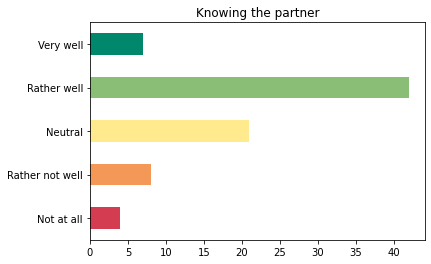

In [29]:
survey_teachers_finished['EX06'].value_counts().reindex([
    "Not at all", "Rather not well", "Neutral", "Rather well", "Very well"
]).plot.barh(
    title="Knowing the partner",
    color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c']
)

**EX07** Which factors or conditions would need to change for you to use pair programming in your class in the future?

In [30]:
# TODO Free text analysis

### Pair formation

**PF01** Which of the following aspects, if any, did you consider while distributing your students into pairs for pair programming?

<AxesSubplot:title={'center':'Aspects considered for pair formation'}>

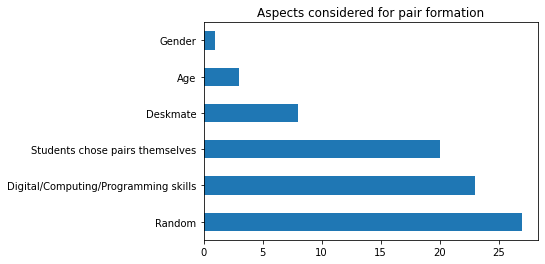

In [35]:
survey_teachers_finished['PF01'].value_counts().plot.barh(
    title="Aspects considered for pair formation",
)

**PF02** How specifically did you consider the gender aspect when dividing students into pairs?

<AxesSubplot:title={'center':'Gender aspect'}, ylabel='PF02'>

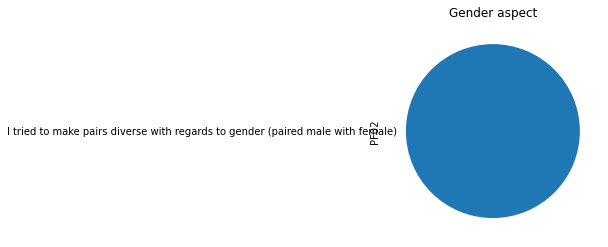

In [8]:
gender_considered = survey_teachers_finished[survey_teachers_finished['PF01'] == 'Gender']
gender_considered['PF02'].value_counts().plot.pie(
    title="Gender aspect",
)

**PF03** How specifically did you consider the ethnicity aspect when dividing students into pairs? 

**No data since no one chose ethnicity in pf01**

**PF04** How specifically did you consider age when dividing students into pairs? 

<AxesSubplot:title={'center':'Age aspect'}, ylabel='PF04'>

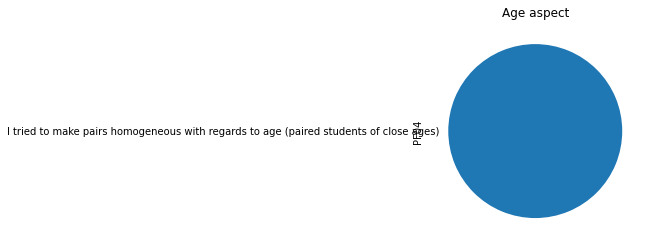

In [14]:
age_considered = survey_teachers_finished[survey_teachers_finished['PF01'] == 'Age']
age_considered['PF04'].value_counts().plot.pie(
    title="Age aspect",
)

**PF05** How specifically did you consider digital/computing competency when dividing students into pairs? 

<AxesSubplot:title={'center':'Digital/Computing/Programming skills aspect'}, ylabel='PF05'>

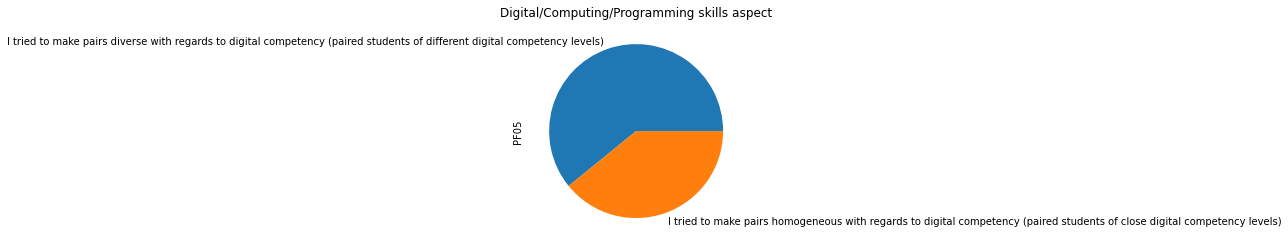

In [15]:
digital_comp_considered = survey_teachers_finished[survey_teachers_finished['PF01'] == 'Digital/Computing/Programming skills']
digital_comp_considered['PF05'].value_counts().plot.pie(
    title="Digital/Computing/Programming skills aspect",
)

**PF06** Please shortly explain the reasons for your choice of pairing the students.

In [16]:
# TODO Free text analysis

### Behavioural patterns

**BP01** In this specific course, did you observe cases in which a student dominates over their partner in the discussion of the task?

<AxesSubplot:title={'center':'Domination pattern'}>

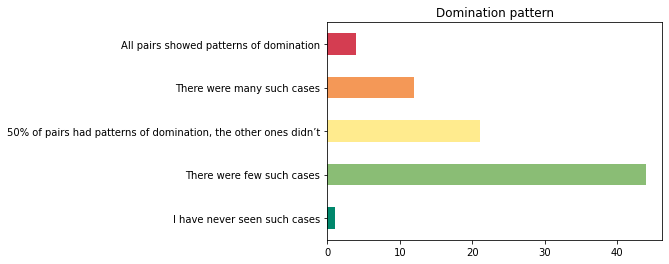

In [26]:
survey_teachers_finished['BP01'].value_counts().reindex([
    'I have never seen such cases', 
    'There were few such cases', 
    '50% of pairs had patterns of domination, the other ones didn’t', 
    'There were many such cases',
    'All pairs showed patterns of domination'
]).plot.barh(title="Domination pattern", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'][::-1])

**BP02** In this specific course, did you observe cases in which a students did not follow the rules regarding role responsibilities (e.g. driver and navigator)?

<AxesSubplot:title={'center':'Role switching pattern'}>

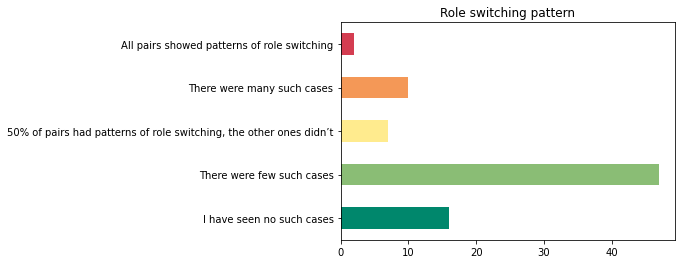

In [27]:
survey_teachers_finished['BP02'].value_counts().reindex([
    'I have seen no such cases', 
    'There were few such cases', 
    '50% of pairs had patterns of role switching, the other ones didn’t', 
    'There were many such cases',
    'All pairs showed patterns of role switching'
]).plot.barh(title="Role switching pattern", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'][::-1])

**BP03** In this specific course, did you observe cases in which students neither appreciated their partner nor took into account other ideas?

<AxesSubplot:title={'center':'Acknowledgment pattern'}>

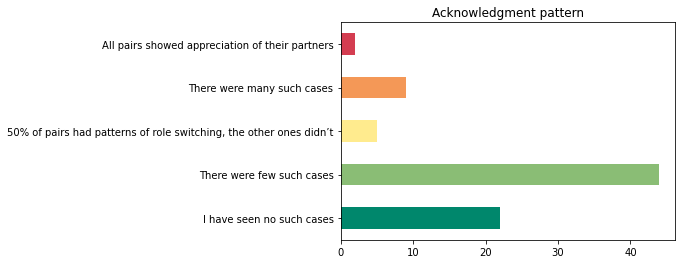

In [30]:
# This question is wrong and should be disregarded
# There are errors in answer options
survey_teachers_finished['BP03'].value_counts().reindex([
    'I have seen no such cases', 
    'There were few such cases', 
    '50% of pairs had patterns of role switching, the other ones didn’t', 
    'There were many such cases',
    'All pairs showed appreciation of their partners'
]).plot.barh(title="Acknowledgment pattern", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'][::-1])

### Performance

**PE01** How did pair programming influence the students’ learning (e.g. programming skills) in this specific course?

<AxesSubplot:title={'center':'Learning skills influence'}>

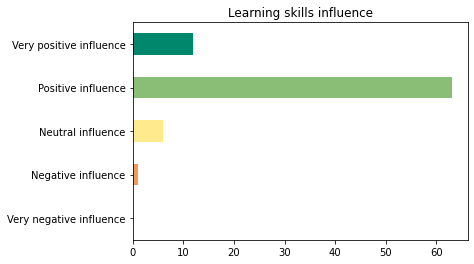

In [31]:
survey_teachers_finished['PE01'].value_counts().reindex([
    'Very negative influence', 
    'Negative influence', 
    'Neutral influence', 
    'Positive influence',
    'Very positive influence'
]).plot.barh(title="Learning skills influence", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

**PE02** Which kind of feedback did students have about pair programming in this specific course?

<AxesSubplot:title={'center':'Students feedback'}>

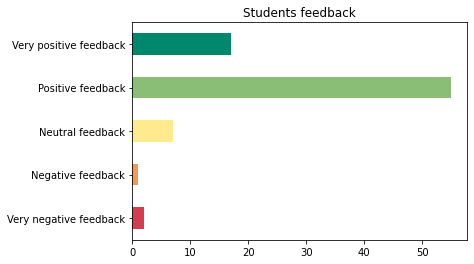

In [34]:
survey_teachers_finished['PE02'].value_counts().reindex([
    'Very negative feedback', 
    'Negative feedback', 
    'Neutral feedback', 
    'Positive feedback',
    'Very positive feedback'
]).plot.barh(title="Students feedback", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

**PE03** How did pair programming influence the students’ social skills (e.g. collaboration) in this specific course?

<AxesSubplot:title={'center':'Social skills influence'}>

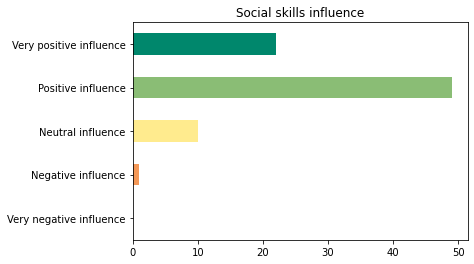

In [32]:
survey_teachers_finished['PE03'].value_counts().reindex([
    'Very negative influence', 
    'Negative influence', 
    'Neutral influence', 
    'Positive influence',
    'Very positive influence'
]).plot.barh(title="Social skills influence", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

**PE04** Please state shortly which social skills were influenced by this course.

In [17]:
# todo: Free text analysis

**PE05** Please state shortly which learning skills were influenced by this course.

In [18]:
# todo: Free text analysis

### Equity and PP

**EQ01** Do you think that pair programming supports equity between students?

<AxesSubplot:title={'center':'Equity support'}>

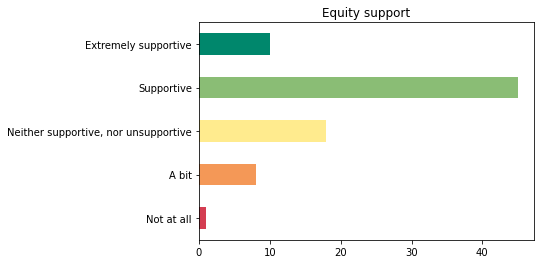

In [35]:
survey_teachers_finished['EQ01'].value_counts().reindex([
    'Not at all', 
    'A bit', 
    'Neither supportive, nor unsupportive', 
    'Supportive',
    'Extremely supportive'
]).plot.barh(title="Equity support", color=['#d43d51', '#f49857', '#ffeb8e', '#8abd75', '#00876c'])

**EQ02** Please shortly explain your choice in the previous question.

In [19]:
# todo: Free text analysis

# Correlations

To find correlations, let's first encode Likert scale responses as scores from 1 to 5.

In [5]:
likert_responses_students = {
#     CS pre-experience
    'ED03': ['Novice', 'Advanced Beginner', 'Competent', 'Proficient', 'Expert'],
#     Overall experience in specific course
    'EX01': ["Very negative", "Negative", "Neutral", "Positive", "Very positive"],
# Overall experience
    'EX05': ["Very negative", "Negative", "Neutral", "Positive", "Very positive"],
# Knowing the partner    
    'EX06': ["Not at all", "Rather not well", "Neutral", "Rather well", "Very well"],
# Acknowledgement
    'BP03': ['My partner did not listen to me and appreciate my comments at all.', 'My partner mostly did not listen to me and appreciate my comments.', 'My partner sometimes listened to me and appreciated my comments and sometimes not.', 'My partner most of the time listened to me and appreciated my comments.','My partner always listened to me and appreciated my comments.'],
#     Learning performance
    'PE01': ['Very negative influence', 'Negative influence', 'Neutral influence', 'Positive influence', 'Very positive influence'],
#     Social performance
    'PE02': ['Very negative influence', 'Negative influence', 'Neutral influence', 'Positive influence','Very positive influence'],
#     Confidence
    'PE05': ['Strongly disagree', 'Disagree', 'Neutral', 'Agree','Strongly agree'],
#     Equity support
    'EQ01': ['Not at all', 'A bit', 'Neither yes, neither no', 'Supportive','Extremely supportive']
}

likert_responses_students_upd = {}
for key, item in likert_responses_students.items():
    likert_responses_students_upd[key] = {}
    for i in range(len(item)):
        likert_responses_students_upd[key][item[i]] = i+1

likert_responses_students = likert_responses_students_upd

survey_students_encoded = survey_students_finished.replace(likert_responses_students)
survey_students_encoded.describe()

,CASE,ED03,EX01,EX05,EX06,BP03,PE01,PE02,PE05,EQ01,TIME_SUM,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,DEG_TIME
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.0,252.0,252.0,252.0,252.000000
mean,613.666667,2.896825,3.880952,3.880952,3.579365,3.821429,3.888889,3.861111,3.892857,3.523810,655.543651,1.0,0.0,8.0,8.0,22.952381
std,79.368925,0.976451,0.789444,0.720858,1.131604,0.903654,0.676554,0.736469,0.778463,0.971419,300.161461,0.0,0.0,0.0,0.0,36.213919
min,423.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,91.000000,1.0,0.0,8.0,8.0,0.000000
25%,545.750000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,431.000000,1.0,0.0,8.0,8.0,4.000000
50%,612.500000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,602.500000,1.0,0.0,8.0,8.0,13.000000
75%,679.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,814.000000,1.0,0.0,8.0,8.0,29.000000
max,756.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1619.000000,1.0,0.0,8.0,8.0,295.000000


## Correlations for students data

<AxesSubplot:title={'center':'Relation between acknowledgment, knowing your partner and positivity of experience'}, xlabel='EX06', ylabel='BP03'>

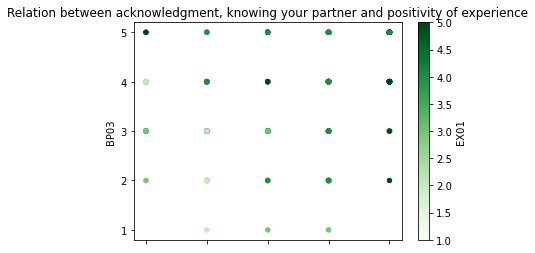

In [6]:
survey_students_encoded.plot.scatter(
    x='EX06', 
    y='BP03', 
    c='EX01', 
    colormap='Greens', 
    xticks=[1,2,3,4,5], 
    yticks=[1,2,3,4,5],
    title='Relation between acknowledgment, knowing your partner and positivity of experience'
)

In [48]:
correlations_students = survey_students_encoded.corr()
correlations_students[abs(correlations_students) >= 0.5].iloc[:, :-6][:-6].fillna("")

,CASE,ED03,EX01,EX05,EX06,BP03,PE01,PE02,PE05,EQ01
CASE,1.0,,,,,,,,,
ED03,,1.0,,,,,,,,
EX01,,,1.0,0.626083,,,,,,
EX05,,,0.626083,1.0,,,,,,
EX06,,,,,1.0,,,,,
BP03,,,,,,1.0,,,,
PE01,,,,,,,1.0,,0.605168,
PE02,,,,,,,,1.0,0.502079,
PE05,,,,,,,0.605168,0.502079,1.0,
EQ01,,,,,,,,,,1.0


Correlations found:
* EX01, EX05 (How would you rate your experience with pair programming in this specific course? In general, how would you rate your experiences with pair programming?)
* PE01, PE05 (How did pair programming influence your learning (e.g. programming skills) in this specific course? Pair Programming helped me to be confident in my ability to program and solve problems in this task or later on.)
* PE02, PE05 (How did pair programming influence your social skills (e.g. collaboration) in this specific course? Pair Programming helped me to be confident in my ability to program and solve problems in this task or later on.)

## Correlations for teachers data

In [34]:
likert_responses_teachers = {
#     Overall experience in specific course
    'EX01': ["Very negative", "Negative", "Neutral", "Positive", "Very positive"],
# Overall experience
    'EX03': ["Very negative", "Negative", "Neutral", "Positive", "Very positive"],
#     CS pre-experience of students
    'EX05': ['Novice', 'Advanced Beginner', 'Competent', 'Proficient', 'Expert'],
# Knowing the partner    
    'EX06': ["Not at all", "Rather not well", "Neutral", "Rather well", "Very well"],
# Domination
    'BP01': ["I have never seen such cases", "There were few such cases", "50% of pairs had patterns of domination, the other ones didn’t", "There were many such cases", "All pairs showed patterns of domination"],
# Role switching 
    'BP02': ["I have seen no such cases", "There were few such cases", "50% of pairs had patterns of role switching, the other ones didn’t", "There were many such cases", "All pairs showed patterns of role switching"],
#     Learning performance
    'PE01': ['Very negative influence', 'Negative influence', 'Neutral influence', 'Positive influence', 'Very positive influence'],
#     Students feedback
    'PE02': ["Very negative feedback", "Negative feedback", "Neutral feedback", "Positive feedback", "Very positive feedback"],
#     Social performance
    'PE03': ['Very negative influence', 'Negative influence', 'Neutral influence', 'Positive influence','Very positive influence'],
#     Equity support
    'EQ01': ['Not at all', 'A bit', 'Neither supportive, nor unsupportive', 'Supportive','Extremely supportive']
}

likert_responses_teachers_upd = {}
for key, item in likert_responses_teachers.items():
    likert_responses_teachers_upd[key] = {}
    for i in range(len(item)):
        likert_responses_teachers_upd[key][item[i]] = i+1

likert_responses_teachers = likert_responses_teachers_upd

survey_teachers_encoded = survey_teachers_finished.replace(likert_responses_teachers)
survey_teachers_encoded.describe()

,CASE,EX01,EX03,EX05,EX06,BP01,BP02,PE01,PE03,PE02,...,TIME002,TIME_SUM,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.0,82.0,82.0,82.0,82.000000,82.000000,82.000000,82.000000
mean,357.621951,4.000000,4.134146,2.280488,3.487805,2.682927,2.207317,4.048780,4.121951,4.024390,...,127.560976,450.780488,1.0,0.0,8.0,8.0,2.231707,0.768293,1.099878,16.146341
std,87.873456,0.608581,0.662248,1.033684,0.958959,0.914601,0.978003,0.518841,0.655278,0.753193,...,99.976676,163.465557,0.0,0.0,0.0,0.0,1.317487,0.504273,0.481611,18.988705
min,270.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,25.000000,152.000000,1.0,0.0,8.0,8.0,0.000000,0.000000,0.230000,0.000000
25%,296.500000,4.000000,4.000000,1.000000,3.000000,2.000000,2.000000,4.000000,4.000000,4.000000,...,66.000000,337.250000,1.0,0.0,8.0,8.0,0.750000,0.250000,0.787500,2.250000
50%,317.500000,4.000000,4.000000,2.000000,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,...,97.500000,444.500000,1.0,0.0,8.0,8.0,3.000000,1.000000,1.060000,10.000000
75%,420.000000,4.000000,4.750000,3.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000,...,137.500000,557.500000,1.0,0.0,8.0,8.0,3.000000,1.000000,1.347500,22.750000
max,583.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,489.000000,878.000000,1.0,0.0,8.0,8.0,3.000000,3.000000,2.320000,100.000000


In [49]:
correlations_teachers = survey_teachers_encoded.corr()
correlations_teachers[abs(correlations_teachers) >= 0.5].iloc[:, :-11][:-11].fillna("")

,CASE,EX01,EX03,EX05,EX06,BP01,BP02,PE01,PE03,PE02,EQ01
CASE,1.0,,,,,,,,,,
EX01,,1.0,0.704537,,,,,0.586481,0.526284,0.538668,
EX03,,0.704537,1.0,,,,,0.627464,,0.562627,
EX05,,,,1.0,,,,,,,
EX06,,,,,1.0,,,,,,
BP01,,,,,,1.0,0.50226,,,,
BP02,,,,,,0.50226,1.0,,,,
PE01,,0.586481,0.627464,,,,,1.0,0.526973,0.502387,
PE03,,0.526284,,,,,,0.526973,1.0,,
PE02,,0.538668,0.562627,,,,,0.502387,,1.0,


More correlations here:
* EX01 EX03 (Experience in specific course, overall experience)
* EX01 PE01 (Experience in specific course, learning performance)
* EX01 PE02 (Experience in specific course, students feedback)
* EX01 PE03 (Experience in specific course, social skills)
* EX03 PE01 (Overall experience, learning performance)
* EX03 PE02 (Overall experience, students feedback)
* BP01 BP02 (Domination, role switching)
* PE01 PE02 (Learning performance, students feedback)
* PE01 PE03 (Learning performance, social skills)